In [1]:
## Long Short Term Memory (LSTM) Recurrent Neural Network (RNN)
## This video was guided by the following tutorial: https://www.youtube.com/watch?v=QIUxPv5PJOY

## This program considers the past 60 day stock price for predictoions.

In [2]:
!pip install --upgrade pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 14.4 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.0 MB/s 
     |████████████████████████████████| 4.1 MB 18.9 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 128 kB 70.8 MB/s 
     |████████████████████████████████| 110 kB 73.7 MB/s 
     |████████████████████████████████| 112 kB 38.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Foun

In [3]:
# Importing relevant libraries

import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Retrieve stock quotes

import yfinance as yf
yf.pdr_override() 

df = web.get_data_yahoo('PREIX', start='2012-01-01', end='2019-12-17')

# Display data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,34.400002,34.400002,34.400002,34.400002,27.741463,0
2012-01-04,34.419998,34.419998,34.419998,34.419998,27.757587,0
2012-01-05,34.520000,34.520000,34.520000,34.520000,27.838236,0
2012-01-06,34.439999,34.439999,34.439999,34.439999,27.773720,0
2012-01-09,34.520000,34.520000,34.520000,34.520000,27.838236,0
...,...,...,...,...,...,...
2019-12-10,83.709999,83.709999,83.709999,83.709999,78.802460,0
2019-12-11,83.959999,83.959999,83.959999,83.959999,79.037804,0
2019-12-12,84.120003,84.120003,84.120003,84.120003,79.729713,0


In [5]:
# Retrieve matrix dimensions

df.shape

(2002, 6)

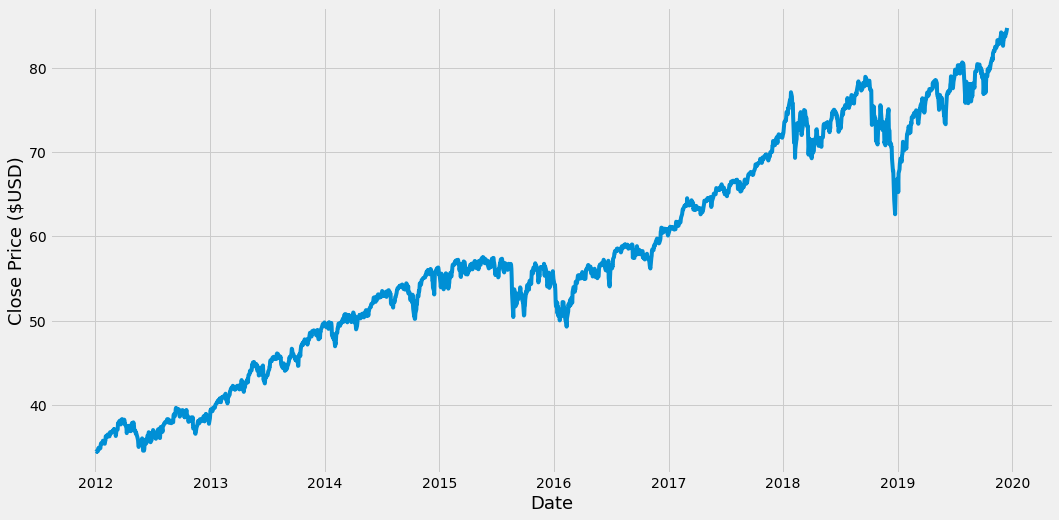

In [6]:
# Visualize the closing price

plt.figure(figsize=(16,8))
plt.title='Close Price History'
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($USD)', fontsize=18)

plt.show()

In [7]:
# Create a new dataframe with only closing prices

data = df.filter(['Close'])

# Convert dataframe to a numpy array
dataset = data.values

# Compute row count to train the model on => 80% of data for training
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

1602


In [8]:
# Scale the data for preprocessing

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)   # Computes min and max values for scaling, then transforms. Standardizes data from 0 to 1 inclusive

scaled_data

array([[0.00000000e+00],
       [3.97231715e-04],
       [2.38376918e-03],
       ...,
       [9.87683847e-01],
       [9.88081078e-01],
       [1.00000000e+00]])

In [9]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])   # Positions 0 to 59
  y_train.append(train_data[i, 0])        # Position 60
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.        , 0.00039723, 0.00238377, 0.00079454, 0.00238377,
       0.00854192, 0.00874054, 0.01032969, 0.00695269, 0.00933646,
       0.01708377, 0.02065946, 0.02105677, 0.02145407, 0.02065946,
       0.02681761, 0.02284461, 0.02165277, 0.01986492, 0.01966623,
       0.026023  , 0.02681761, 0.037346  , 0.03694869, 0.03853792,
       0.04032576, 0.04131899, 0.03635276, 0.04131899, 0.04092169,
       0.03714738, 0.04529199, 0.04688115, 0.04747715, 0.0450933 ,
       0.04827176, 0.0496623 , 0.05065553, 0.05323799, 0.04986092,
       0.05442984, 0.05204607, 0.04926499, 0.03794199, 0.04310684,
       0.05045684, 0.0530393 , 0.05323799, 0.06674607, 0.06595153,
       0.07032176, 0.07131507, 0.07429476, 0.07191099, 0.07052045,
       0.06515691, 0.06754068, 0.07787045, 0.07588399, 0.06932853])]
[0.06813668165871589]

[array([0.        , 0.00039723, 0.00238377, 0.00079454, 0.00238377,
       0.00854192, 0.00874054, 0.01032969, 0.00695269, 0.00933646,
       0.01708377, 0.02065946, 0.02

In [10]:
# Convert x_train and y_train to numpy arrays 

x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Reshape the x_train data set => Add third column

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [12]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [13]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 48s 29ms/step - loss: 0.0013


In [15]:
# Create the testing data set

# Array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [16]:
# Convert the data to a numpy array

x_test = np.array(x_test)


In [17]:
# Reshape the data 

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Num of rows, num of columns, num of features (just the close price)


In [18]:
# Retrieve model's predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)   # Unscale predictions to compare to original closing prices (y_test)



13/13 [==============================] - 1s 15ms/step


In [19]:
# Evaluate root mean square error (RMSE) => Standard deviation of the residuals

rmse = np.sqrt( np.mean( predictions - y_test )**2 )
print(rmse)

0.6806653118133545


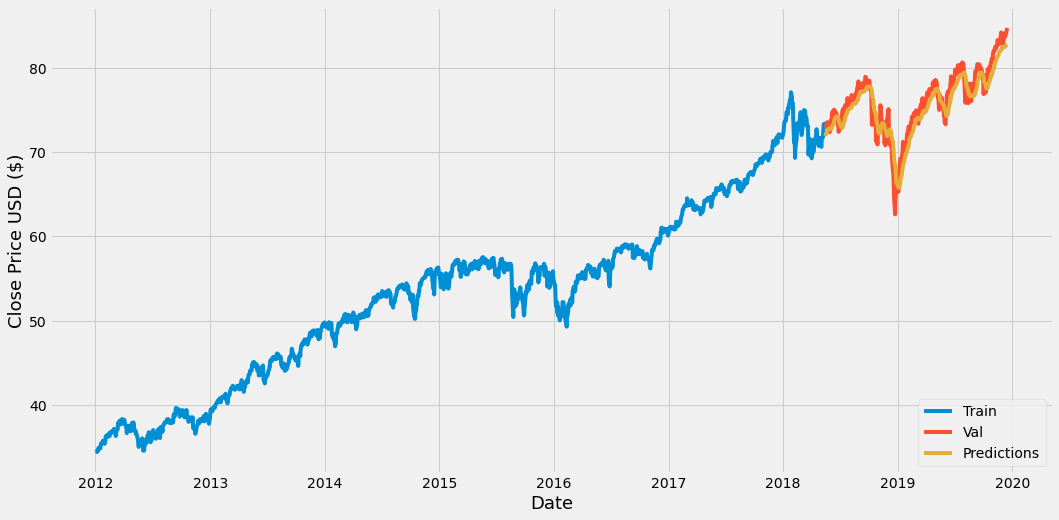

In [20]:
# Plot the data

train = data[:training_data_len].copy()  
valid = data[training_data_len:].copy()  

valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title='Model'
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
# Display valid and predicted prices

valid

,Close,Predictions
Date,,
2018-05-16,73.209999,71.918503
2018-05-17,73.160004,72.102867
2018-05-18,72.980003,72.260521
2018-05-21,73.519997,72.378502
2018-05-22,73.290001,72.503288
...,...,...
2019-12-10,83.709999,82.528366
2019-12-11,83.959999,82.570457
2019-12-12,84.120003,82.627213


In [22]:
# Predict closing price for ^GSPC stock on december 18, 2019

#.Retrieve actual quote
apple_quote=web.get_data_yahoo('PREIX', start='2012-01-01', end='2019-12-17')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Retrieve only last 60 days of data and convert to array
last_sixty_days = new_df[-60:].values

# Scale the data to [0:1]
last_sixty_days_scaled = scaler.transform(last_sixty_days)

# Initialize list
new_x_test = []
new_x_test.append(last_sixty_days_scaled)

# Convert to numpy array
new_x_test = np.array(new_x_test)

# Reshape
new_x_test = np.reshape(new_x_test, (new_x_test.shape[0], new_x_test.shape[1], 1))

# Calculate predictions
pred_price = model.predict(new_x_test)

# Rescale predictions 
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 19ms/step
[[82.88836]]


In [23]:
# Evaluate efficacy of model

# Retrieve actual future quote data
actual_apple_quote=web.get_data_yahoo('PREIX', start='2019-12-18', end='2019-12-19')
print(actual_apple_quote['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-18    84.739998
Name: Close, dtype: float64
